In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
from bluedot import rossli 
from bluedot import geometry

In [27]:
import pylab
import matplotlib.pyplot as plt
from bluedot import rossli 
from bluedot import geometry
from bluedot import read_hdf_MCD
from bluedot import blue_calendar
from bluedot import brdf_modis
from bluedot import read_isccp
from bluedot import resamp_healpix
import healpy as hp
import numpy as np
import argparse
from astropy.time import Time
import glob
from datetime import datetime
import time
from bluedot import generate_globe as gg
from bluedot import makeinput as mi
from bluedot import iouvspec


In [29]:
nsideg=16
ispec=1
phioffset=1.65588 #offset of longitude so that phi=0 at the substellar point in the vernal equinox in 2008
#march 20 5:48
modismeanpath="/home/kawahara/sotica/data/mean2008/mean2008_"+str(ispec)+".npz"
mcdpath="/home/kawahara/sotica/data/MODIS/MCD43C1/MCD43C1*.hdf"
ancpath="/home/kawahara/sotica/bluedot/ANC.GPC"
wrappath="/home/kawahara/sotica/bluedot/wrapgpc.so"
d1path="/home/kawahara/sotica/data/ISCCP/d1"

#gg.set_globalgg(nsideg,ispec,phioffset,modismeanpath,mcdpath,ancpath,wrappath,d1path)
fiso_mean, fvol_mean, fgeo_mean, jdlist, jdmlist, ut, mcdfilelist, ldmask, thetam, phim=gg.initgg()

start = time.time()
utcstr, jd, fisox, fvolx, fgeox, galtx, cthx, ntotx, ncloudx, meantauxd, landfx=gg.set_gsurface("ISCCP.D1.1.GLOBAL.2008.03.20.0600.GPC",fiso_mean, fvol_mean, fgeo_mean, jdmlist, mcdfilelist, ldmask, thetam, phim)
elapsed_time = time.time() - start
print( ("set surface :{0}".format(elapsed_time)) + "[sec]")

TypeError: initgg() missing 2 required positional arguments: 'pdata' and 'pcol'

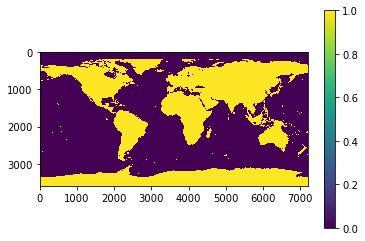

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
a=ax.imshow(ldmask)
pylab.colorbar(a)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


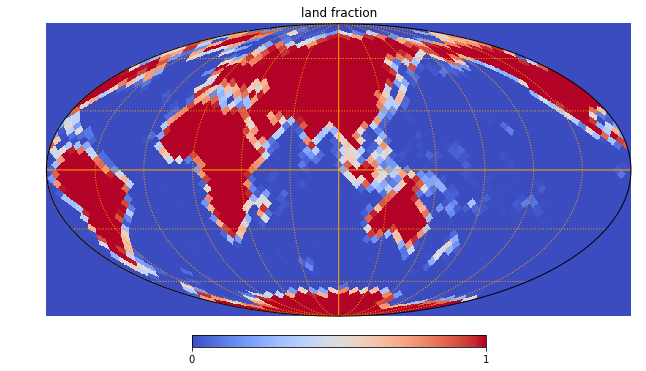

In [6]:
hp.mollview(landfx,title="land fraction",flip="geo",cmap=plt.cm.coolwarm,min=0.0,max=1.0)
hp.graticule(color="orange")

In [ ]:
mask=(meantauxd==-1000)
maptmp=np.copy(meantauxd)
maptmp[mask]=None
hp.mollview(meantauxd,title="mean tau",flip="geo",cmap=plt.cm.coolwarm,min=0.0,max=10.0)
hp.graticule(color="orange")

In [24]:
start = time.time()
utcstr, jd, fisox, fvolx, fgeox, galtx, cthx, ntotx, ncloudx, meantauxd, landfx=gg.set_gsurface("ISCCP.D1.1.GLOBAL.2008.03.28.0900.GPC",fiso_mean, fvol_mean, fgeo_mean, jdmlist, mcdfilelist, ldmask, thetam, phim)
elapsed_time = time.time() - start
print( ("set surface :{0}".format(elapsed_time)) + "[sec]")

('npix=', 3072)
('npix=', 3072)
('npix=', 3072)
('npix=', 3072)
('npix=', 3072)
[2008    3   28    9]
2008-03-28 09:00:00
2008-03-28 09:00:00
('/home/kawahara/sotica/data/MODIS/MCD43C1/MCD43C1.A2008073.005.2008097185201.hdf', '-', '/home/kawahara/sotica/data/MODIS/MCD43C1/MCD43C1.A2008081.005.2008102154441.hdf')
('npix=', 3072)
('npix=', 3072)
('npix=', 3072)
('npix=', 3072)
set surface :91.02813339233398[sec]


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


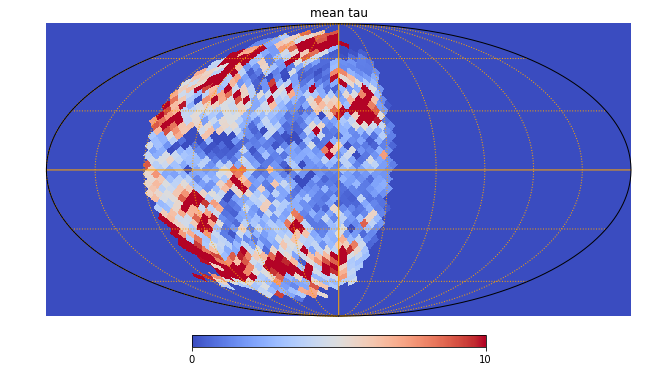

In [25]:
mask=(meantauxd==-1000)
maptmp=np.copy(meantauxd)
maptmp[mask]=None
hp.mollview(meantauxd,title="mean tau",flip="geo",cmap=plt.cm.coolwarm,min=0.0,max=10.0)
hp.graticule(color="orange")

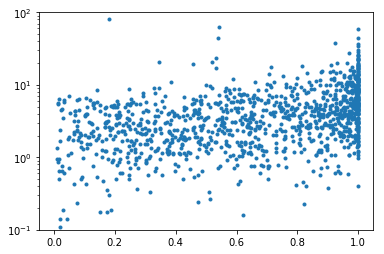

In [34]:
fig=plt.figure()
ax=fig.add_subplot()
plt.plot(fcld,meantauxd,".")
plt.ylim(0.1,100)
plt.yscale("log")
#plt.xscale("log")
plt.show()

In [26]:
ntotx[ntotx==0.0]=1.0
fcld=ncloudx/ntotx

In [19]:
len(fcld[fcld<=0.0])

44

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


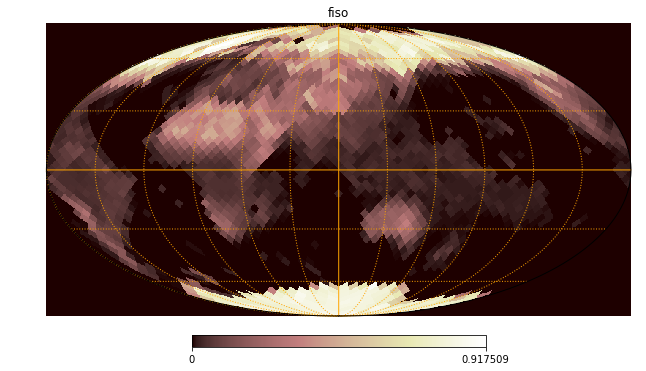

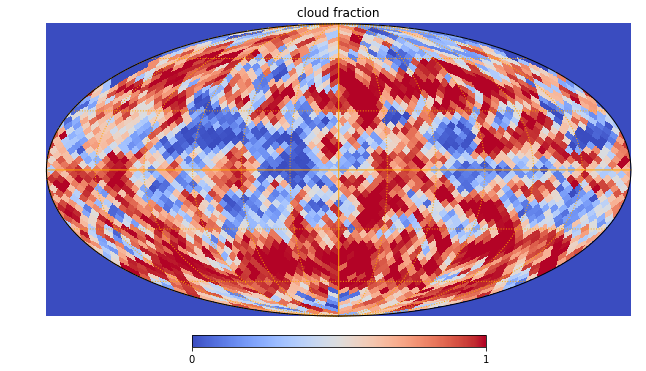

In [13]:
hp.mollview(fisox,title="fiso",flip="geo",cmap=plt.cm.pink)
hp.graticule(color="orange");
hp.mollview(fcld,title="cloud fraction",flip="geo",cmap=plt.cm.coolwarm)
hp.graticule(color="orange")

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


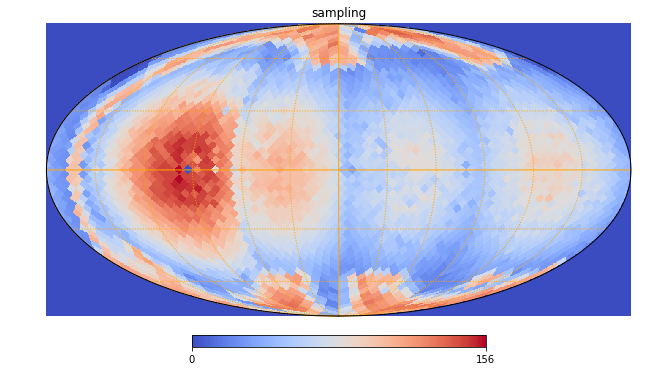

In [4]:
hp.mollview(np.array(list(map(float,ntotx))),title="sampling",flip="geo",cmap=plt.cm.coolwarm)
hp.graticule(color="orange")

In [24]:
inc=45/180.0*np.pi
Thetaeq=30.0/180.0*np.pi
zeta=80.0/180.0*np.pi
Thetav=45.0/180.0*np.pi
Phiv=60.0/180.0*np.pi

In [ ]:
mask=(meantauxd==-1000)
maptmp=np.copy(meantauxd)

In [25]:
np.array(hp.pix2ang(16,[0,1]))

array([[ 0.05103658,  0.05103658],
       [ 0.78539816,  2.35619449]])

In [64]:
fcl=ncloudx/list(map(float,ntotx))

/home/kawahara/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [67]:
print(fcl[i])

0.569620253165


In [63]:
start = time.time()
default_input="/Users/kawahara/sotica/bluedot/input/template.INP"
nband=1801
npix=hp.nside2npix(nsideg)
thetax,phix=hp.pix2ang(nsideg,range(0,npix))
eO=geometry.uniteO(inc,Thetaeq)
eS=geometry.uniteS(Thetaeq,Thetav)
radall=[]
for ipix in range(0,npix):
    eR=geometry.uniteR(zeta,Phiv,thetax[ipix],phix[ipix])
    uRS=np.dot(eR,eS)[0]
    uRO=np.dot(eR,eO)[0]
    if uRS >0.0 and uRO >0.0:
        uvinput=mi.setip_default(default_input)
        #geometry
        uOS=np.dot(eO,eS)
        sza=np.arccos(uRS)
        vza=np.arccos(uRO)
        aza=np.arccos(uOS-uRS*uRO)
        uvinput=mi.setip_angles(uvinput,sza,vza,aza)
        
        if landfx[ipix]>0.5:
            uvinput=mi.setip_rossli(uvinput,fisox[ipix],fvolx[ipix],fgeox[ipix])
            inputfile="/Users/kawahara/sotica/bluedot/tmp/tmp"+str(ipix)+"r.INP"
        else:
            uvinput=mi.setip_ocean(uvinput)
            #uvinput=mi.setip_black_ocean(uvinput)
            inputfile="/Users/kawahara/sotica/bluedot/tmp/tmp"+str(ipix)+"o.INP"
        mi.save_uvinput(inputfile,uvinput)
        #print inputfile
        #start=time.time()
        lamb,rad=iouvspec.uvspec_form1(inputfile)
        radall.append(rad)
        #elapsed_time = time.time() - start
        #print "ipix="+str(ipix)+"/"+str(npix)+" landf="+str(landfx[ipix])+" CPU elapsed_time:{0}".format(elapsed_time)+"[sec]"
    else:
        radall.append(np.zeros(nband))
elapsed_time = time.time() - start
print( ("set surface :{0}".format(elapsed_time)) + "[sec]")

KeyboardInterrupt: 

In [54]:
np.savez("/Users/kawahara/rad_ocean_bedf_template2.npz",radall)
#np.savez("/Users/kawahara/rad_ocean_bedf_nohotspot.npz",radall)

In [55]:
newd=np.load("/Users/kawahara/rad_ocean_bedf_template2.npz")

In [56]:
np.shape(newd["arr_0"])

(3072,)

In [57]:
srad=np.sum(newd["arr_0"],axis=1)

ValueError: 'axis' entry is out of bounds

In [58]:
np.shape(srad)

(3072,)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


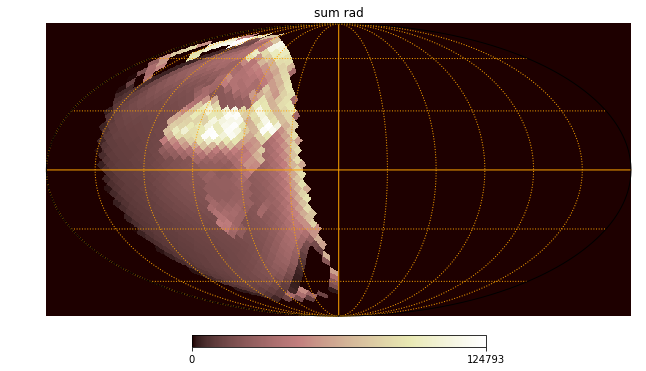

In [51]:
hp.mollview(srad,title="sum rad",flip="geo",cmap=plt.cm.pink,min=0.0)
hp.graticule(color="orange");

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


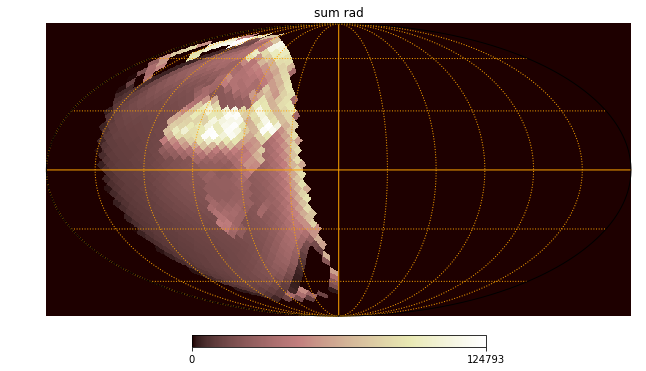

In [38]:
hp.mollview(srad,title="sum rad",flip="geo",cmap=plt.cm.pink,min=0.0)
hp.graticule(color="orange");